### 一元线性回归

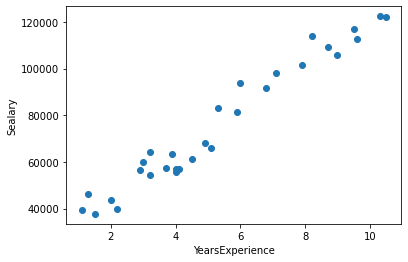

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
income = pd.read_csv("C:/Users/ylc/GitHub/Learning/Python/PyhtonDataMiningFromZero/Salary_Data.csv")
plt.scatter(x=income.YearsExperience, y=income.Salary)
plt.xlabel("YearsExperience")
plt.ylabel("Sealary")
plt.show()

In [14]:
import statsmodels.api as sm
fit = sm.formula.ols('Salary ~ YearsExperience', data=income).fit() # 构建回归模型
fit.summary() # 返回模型参数

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 03 May 2022   Prob (F-statistic):           1.14e-20
Time:                        11:30:36   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

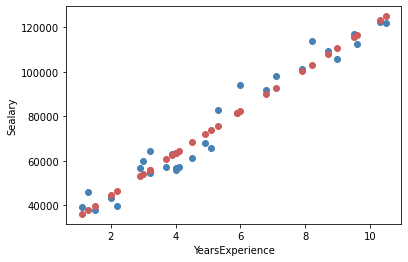

In [20]:
income['pred'] = fit.predict(exog = income.YearsExperience) # 预测
plt.scatter(x=income.YearsExperience, y=income.Salary, color='steelblue', label='True')
plt.scatter(x=income.YearsExperience, y=income.pred, color='indianred', label='Pred')
plt.xlabel("YearsExperience")
plt.ylabel("Sealary")
plt.show()

### 多元线性回归

In [56]:
import pandas as pd
Profit = pd.read_excel("C:/Users/ylc/GitHub/Learning/Python/PyhtonDataMiningFromZero/Predict to Profit.xlsx")
print(Profit[0:3])

    RD_Spend  Administration  Marketing_Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39


In [57]:
from sklearn import model_selection
import statsmodels.api as sm
train, test = model_selection.train_test_split(Profit, test_size=0.2, random_state=1234) # 抽取训练集和测试集
model = sm.formula.ols('Profit ~ RD_Spend+Administration+Marketing_Spend+C(State)', data=train).fit() # 训练多元线性回归模型
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     174.6
Date:                Tue, 03 May 2022   Prob (F-statistic):           9.74e-23
Time:                        14:32:26   Log-Likelihood:                -401.20
No. Observations:                  39   AIC:                             814.4
Df Residuals:                      33   BIC:                             824.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.858e+04   6690.704      8.756      0.000     4.5e+04    7.22e+04
C(State)[T.Florida]    927.3944   3084.857      0.301      0.766   -5348.795    7203.584
C(State)[T.New York]  -513.4683   3043.160     -0.169      0.867   -6704.824    5677.887
RD_Spend                 0.8035      0.040     19.988      0.000       0.722       0.885
Administration          -0.0578      0.051     -1.133      0.265      -0.162       0.046
Marketing_Spend          0.0138      0.015      0.930      0.359      -0.016       0.044
==============================================================================
Omnibus:                        1.721   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                1.148
Skew:                           0.096   Prob(JB):                        0.563
Kurtosis:                       2.182   Cond. No.                     1.56e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
test_X = test.drop(labels='Profit', axis=1) # 删除test数据集中Profit变量，用剩下的自变量进行预测
pred = model.predict(exog=test_X) # 进行预测
result = pd.DataFrame({'True':test.Profit, 'Pred':pred})
print("对比预测值和实际值的差异：\n", result)

对比预测值和实际值的差异：
          True           Pred
8   152211.77  150621.345802
48   35673.41   55513.218079
14  132602.65  150369.022458
42   71498.49   74057.015562
29  101004.64  103413.378282
44   65200.33   67844.850378
4   166187.94  173454.059692
31   97483.56   99580.888894
13  134307.35  128147.138397
18  124266.90  130693.433835


### 正态性检验

#### 直方图法

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


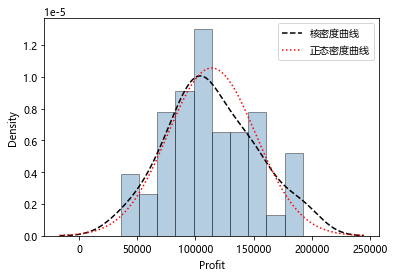

In [7]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
Profit = pd.read_excel("C:/Users/ylc/GitHub/Learning/Python/PyhtonDataMiningFromZero/Predict to Profit.xlsx")
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
sns.distplot(a=Profit.Profit, bins=10, fit=stats.norm, norm_hist=True,
            hist_kws={'color':'steelblue', 'edgecolor':'black'},
            kde_kws={'color':'black', 'linestyle':'--', 'label':'核密度曲线'},
            fit_kws={'color':'red', 'linestyle':':', 'label':'正态密度曲线'})
plt.legend()
plt.show()

#### QQ图

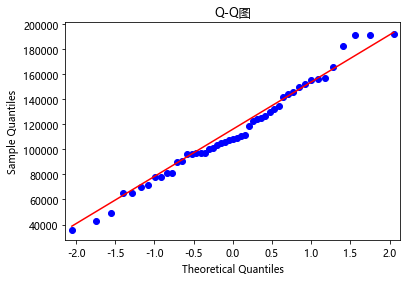

In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
Profit = pd.read_excel("C:/Users/ylc/GitHub/Learning/Python/PyhtonDataMiningFromZero/Predict to Profit.xlsx")
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
pp_qq_plot = sm.ProbPlot(Profit.Profit)
pp_qq_plot.qqplot(line='q') # 绘制QQ图
plt.title('Q-Q图')
plt.show()

#### shapiro检验

In [13]:
import scipy.stats as stats
import pandas as pd
Profit = pd.read_excel("C:/Users/ylc/GitHub/Learning/Python/PyhtonDataMiningFromZero/Predict to Profit.xlsx")
stats.shapiro(Profit.Profit) # Shapiro检验

ShapiroResult(statistic=0.9793398380279541, pvalue=0.537902295589447)

> 无法拒绝服从正态分布的原假设

#### K-S检验

In [14]:
import scipy.stats as stats
import numpy as np
# 生成正态分布和均匀分布随机数
rnorm = np.random.normal(loc=5, scale=2, size=10000)
runif = np.random.uniform(low=1, high=100, size=10000)
# 生态性检验
KS_Test_norm = stats.kstest(rvs=rnorm, args=(rnorm.mean(), rnorm.std()), cdf='norm')
KS_Test_unif = stats.kstest(rvs=runif, args=(runif.mean(), runif.std()), cdf='norm')
print(KS_Test_norm)
print(KS_Test_unif)

KstestResult(statistic=0.005550308430001483, pvalue=0.9159447727683971)
KstestResult(statistic=0.05972593889887273, pvalue=1.8862544893023312e-31)


> 对于正态分布数据的检验无法拒绝服从正态分布的原假设，对于均匀分布数据的检验拒绝了服从正态分布的原假设

### 多重共线性

#### VIF

In [11]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
Profit = pd.read_excel("C:/Users/ylc/GitHub/Learning/Python/PyhtonDataMiningFromZero/Predict to Profit.xlsx")
X = sm.add_constant(Profit.loc[:, ['RD_Spend', 'Administration', 'Marketing_Spend']]) # 自变量（包含常数项）
# 构造空的数据框，用于存储VIF值
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif # 返回vif值

,features,VIF Factor
0,const,25.038136
1,RD_Spend,2.377754
2,Administration,1.175172
3,Marketing_Spend,2.239957


### 异常值检验

In [15]:
import pandas as pd
import statsmodels.api as sm
Profit = pd.read_excel("C:/Users/ylc/GitHub/Learning/Python/PyhtonDataMiningFromZero/Predict to Profit.xlsx")
model = sm.formula.ols('Profit ~ RD_Spend+Administration+Marketing_Spend', data=Profit).fit() # 训练多元线性回归模型

outliers = model.get_influence() # 异常值检验
leverage = outliers.hat_matrix_diag # 高杠杆值点（帽子矩阵）
dffits = outliers.dffits[0] # dffits值
resid_stu = outliers.resid_studentized_external # 学生化残差
cook = outliers.cooks_distance[0] # cook距离

# 合并各种异常值检验的统计量
contat = pd.concat([pd.Series(leverage, name='leverage'),
                   pd.Series(dffits, name='dffits'),
                   pd.Series(resid_stu, name='resid_stu'),
                   pd.Series(cook, name='cook')], axis=1)
Profit.index = range(Profit.shape[0]) # 重设train数据的行索引
profit_outliers = pd.concat([Profit, contat], axis=1) # 将异常值检验统计量与数据集合并
profit_outliers.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit,leverage,dffits,resid_stu,cook
0,165349.20,136897.80,471784.10,New York,192261.83,0.127543,0.080702,0.211069,0.001664
1,162597.70,151377.59,443898.53,California,191792.06,0.125702,0.220891,0.582555,0.012380
2,153441.51,101145.55,407934.54,Florida,191050.39,0.112301,0.516219,1.451360,0.065022
3,144372.41,118671.85,383199.62,New York,182901.99,0.076064,0.406415,1.416453,0.040390
4,142107.34,91391.77,366168.42,Florida,166187.94,0.111680,-0.225341,-0.635531,0.012865


### 方差齐性检验

#### 图形法

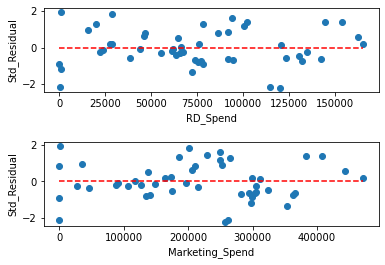

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
Profit = pd.read_excel("C:/Users/ylc/GitHub/Learning/Python/PyhtonDataMiningFromZero/Predict to Profit.xlsx")
model = sm.formula.ols('Profit ~ RD_Spend+Administration+Marketing_Spend', data=Profit).fit() # 训练多元线性回归模型

ax1 = plt.subplot2grid(shape=(2, 1), loc=(0, 0)) # 设置第一张子图的位置
ax1.scatter(Profit.RD_Spend, (model.resid-model.resid.mean())/model.resid.std()) # 绘制散点图
ax1.hlines(y=0, xmin=Profit.RD_Spend.min(), xmax=Profit.RD_Spend.max(), color='red', linestyles='--') # 绘制水平参考线
ax1.set_xlabel('RD_Spend')
ax1.set_ylabel('Std_Residual')

ax2 = plt.subplot2grid(shape=(2, 1), loc=(1,0)) # 设置第二张子图的位置
ax2.scatter(Profit.Marketing_Spend, (model.resid-model.resid.mean())/model.resid.std()) # 绘制散点图
ax2.hlines(y=0, xmin=Profit.Marketing_Spend.min(), xmax=Profit.Marketing_Spend.max(), color='red', linestyle='--')
ax2.set_xlabel('Marketing_Spend')
ax2.set_ylabel('Std_Residual')

plt.subplots_adjust(hspace=0.6, wspace=0.3) # 调整子图之间的水平间距和高度间距
plt.show()

> 标准化残差并没有随自变量的变动而呈现喇叭形，所有的散点几乎均匀地分布在参考线附近<br> 所以可以说明模型的残差项满足方差齐性的假设

#### BP检验

In [18]:
sm.stats.diagnostic.het_breuschpagan(model.resid, exog_het=model.model.exog)

(0.8184841652728102,
 0.8450409476972327,
 0.25481270703905895,
 0.8574972599675053)

> 第一个统计量为LM统计量<br> 第二个统计量是LM对应的概率p值<br> 第三个统计量为F值，用于检验残差平方项与自变量之间是否独立<br> 第四个统计量为F对应的概率p值